In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
# PINN 모델 정의
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 16), nn.SiLU(),
            nn.Linear(16, 64), nn.SiLU(),
            nn.Linear(64, 64), nn.SiLU(),
            nn.Linear(64, 64), nn.SiLU(),
            nn.Linear(64, 16), nn.SiLU(),
            nn.Linear(16, 3)
        )

    def forward(self, x, y, t):
        input_data = torch.stack([x.view(-1), y.view(-1), t.view(-1)], dim=1)
        return self.model(input_data)

In [3]:
# 모델 생성 및 학습 
model = PINN().cuda()
model.load_state_dict(torch.load("model/test_current_min3.pt"))

<All keys matched successfully>

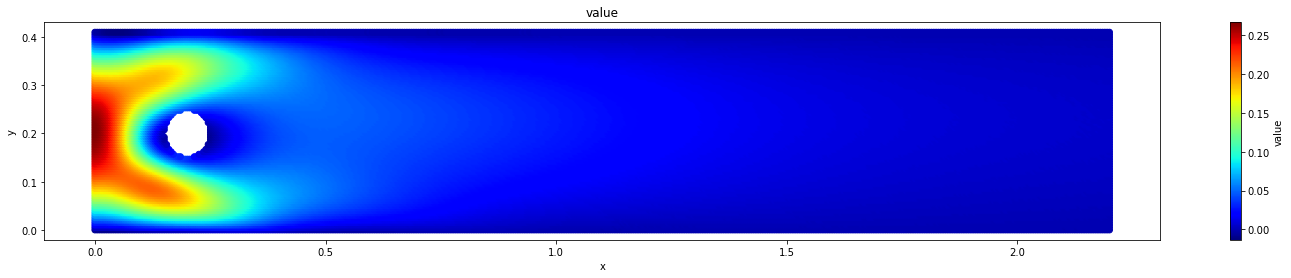

In [7]:
# 학습 데이터 생성 
x_initial = np.linspace(0, 2.2, 440).reshape(-1, 1)
y_initial = np.linspace(0, 0.41, 82).reshape(-1, 1)


x_initial, y_initial = np.meshgrid(x_initial, y_initial)

#cylinder 내부면을 제외한 포인트를 생성
cylinder_mask = (x_initial-0.2) ** 2 + (y_initial-0.2) ** 2 > 0.05 ** 2
x_initial = x_initial[cylinder_mask]
y_initial = y_initial[cylinder_mask]

x_initial_tensor = torch.tensor(x_initial, device="cuda", dtype=torch.float32)
y_initial_tensor = torch.tensor(y_initial, device="cuda", dtype=torch.float32)

# 그래프 생성
fig, ax = plt.subplots(figsize=(25, 4))
u = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor,10))[:,0].detach().cpu().numpy()
v = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor,10))[:,1].detach().cpu().numpy()
p = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor,10))[:,2].detach().cpu().numpy()
vel = (u*u+v*v)**(1/2)
scatter = ax.scatter(x_initial, y_initial, c=u, cmap='jet')
colorbar = plt.colorbar(scatter, ax=ax, label='value')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('value')

plt.show()